In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import halfgennorm
import numpy as np
from math import log
from random import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
"""
This is the state of the data from where we left off in 'distribution_analysis'

The analysis showed that clipping the distribution between 1 and 30 clicks allowed the best fit using the
powerlaw distribution.
"""
original_df = pd.read_csv('data/original/fm_interactions.csv', delimiter='\t')
interaction_df = original_df[original_df['interaction_type'].isin([1, 2, 3])]
user_group = interaction_df.groupby(['user_id'])
user_interaction_count = user_group['item_id'].count()
clipped_interactions = user_interaction_count.clip(1, 31)
user_df = clipped_interactions.to_frame()
user_df.columns = ['interaction_count']
user_df.head()

distribution_df = pd.read_csv('data/synthetic/piecewise_lambda_7_to_7.csv', delimiter=',')
users_df = pd.read_csv('data/original/users.csv', delimiter='\t')

In [4]:
distribution_df.head()

,interaction_count,user_id,prob_a,is_a
0,6,9,0.842263,True
1,6,19,0.842263,True
2,6,305,0.842263,True
3,6,426,0.842263,True
4,6,619,0.842263,True


In [5]:
users_df.head()

,recsyschallenge_v2017_users_final_anonym_export_unique.id,recsyschallenge_v2017_users_final_anonym_export_unique.jobroles,recsyschallenge_v2017_users_final_anonym_export_unique.career_level,recsyschallenge_v2017_users_final_anonym_export_unique.discipline_id,recsyschallenge_v2017_users_final_anonym_export_unique.industry_id,recsyschallenge_v2017_users_final_anonym_export_unique.country,recsyschallenge_v2017_users_final_anonym_export_unique.region,recsyschallenge_v2017_users_final_anonym_export_unique.experience_n_entries_class,recsyschallenge_v2017_users_final_anonym_export_unique.experience_years_experience,recsyschallenge_v2017_users_final_anonym_export_unique.experience_years_in_current,recsyschallenge_v2017_users_final_anonym_export_unique.edu_degree,recsyschallenge_v2017_users_final_anonym_export_unique.edu_fieldofstudies,recsyschallenge_v2017_users_final_anonym_export_unique.wtcj,recsyschallenge_v2017_users_final_anonym_export_unique.premium
0,30,2551922,3,0,0,de,0,1,3,1,2,2,1,0
1,50,"4375874,3415336,2152789,1431010",3,4,15,de,7,3,4,1,2,"5,8",1,0
2,70,"851763,2070276",3,17,4,de,2,2,7,2,0,NaN,1,0
3,90,"2139882,2177068,1520218,3113130,399936",0,0,0,de,0,1,0,0,0,NaN,0,0
4,100,"233434,3142896,3836967,987884",3,0,16,non_dach,0,3,5,5,0,NaN,0,0


In [6]:
user_columns = ['id', 'jobroles', 'career_level', 'discipline_id', 'industry_id', 'country', 'region',
                'experience_n_entries_class', 'years_experience', 'years_in_current', 'edu_degree', 'field_of_studies',
                'wtcj', 'premium']
users_df.columns = user_columns
users_df.head()

,id,jobroles,career_level,discipline_id,industry_id,country,region,experience_n_entries_class,years_experience,years_in_current,edu_degree,field_of_studies,wtcj,premium
0,30,2551922,3,0,0,de,0,1,3,1,2,2,1,0
1,50,"4375874,3415336,2152789,1431010",3,4,15,de,7,3,4,1,2,"5,8",1,0
2,70,"851763,2070276",3,17,4,de,2,2,7,2,0,NaN,1,0
3,90,"2139882,2177068,1520218,3113130,399936",0,0,0,de,0,1,0,0,0,NaN,0,0
4,100,"233434,3142896,3836967,987884",3,0,16,non_dach,0,3,5,5,0,NaN,0,0


In [7]:
print('career_levels: {}'.format(sorted(users_df['career_level'].unique())))
print('disciplines: {}'.format(sorted(users_df['discipline_id'].unique())))
print('industry: {}'.format(sorted(users_df['industry_id'].unique())))
print('country: {}'.format(sorted(users_df['country'].unique())))
print('region: {}'.format(sorted(users_df['region'].unique())))
print('experience_n_entries: {}'.format(sorted(users_df['experience_n_entries_class'].unique())))
print('years_experience: {}'.format(sorted(users_df['years_experience'].unique())))
print('years_in_current: {}'.format(sorted(users_df['years_in_current'].unique())))
print('edu_degree: {}'.format(sorted(users_df['edu_degree'].unique())))
print('wtcj: {}'.format(sorted(users_df['wtcj'].unique())))
print('premium: {}'.format(sorted(users_df['premium'].unique())))


career_levels: [0, 1, 2, 3, 4, 5, 6]
disciplines: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
industry: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
country: ['at', 'ch', 'de', 'non_dach']
region: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
experience_n_entries: [1, 2, 3]
years_experience: [0, 1, 2, 3, 4, 5, 6, 7]
years_in_current: [0, 1, 2, 3, 4, 5, 6, 7]
edu_degree: [0, 1, 2, 3]
wtcj: [0, 1]
premium: [0, 1]


In [8]:
df = pd.merge(users_df, distribution_df, left_on='id', right_on='user_id')

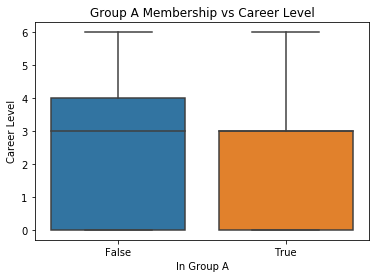

In [9]:
sns.boxplot(x = "is_a", y = "career_level", data=df)
plt.xlabel('In Group A')
plt.ylabel('Career Level')
plt.title('Group A Membership vs Career Level')
plt.show()

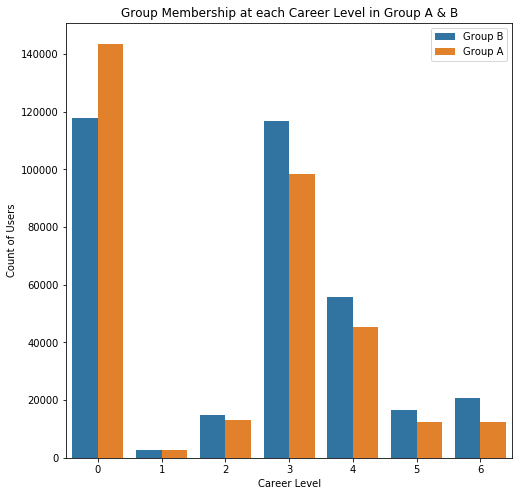

In [16]:
plt.fig = plt.figure(figsize=(8, 8))
sns.countplot(x="career_level", hue='is_a', data=df)
plt.xlabel('Career Level')
plt.ylabel('Count of Users')
plt.legend(['Group B', 'Group A'])
plt.title('Group Membership at each Career Level in Group A & B')
plt.show()

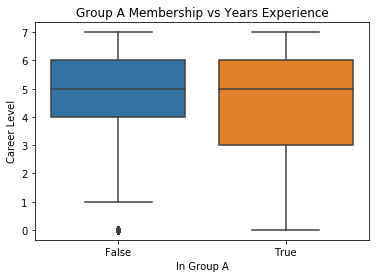

In [20]:
sns.boxplot(x = "is_a", y = "years_experience", data=df)
plt.xlabel('In Group A')
plt.ylabel('Career Level')
plt.title('Group A Membership vs Years Experience')
plt.show()

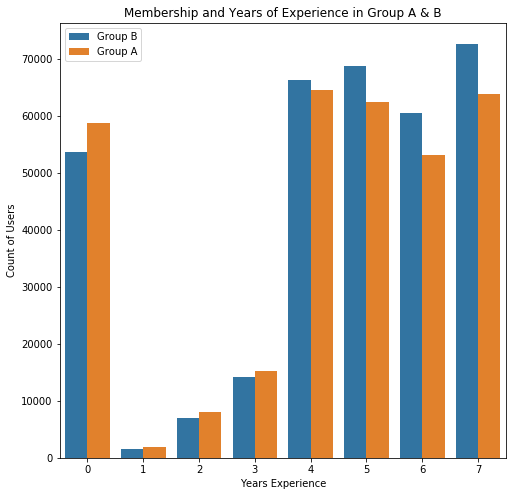

In [22]:
plt.fig = plt.figure(figsize=(8, 8))
sns.countplot(x="years_experience", hue='is_a', data=df)
plt.xlabel('Years Experience')
plt.ylabel('Count of Users')
plt.legend(['Group B', 'Group A'])
plt.title('Membership and Years of Experience in Group A & B')
plt.show()

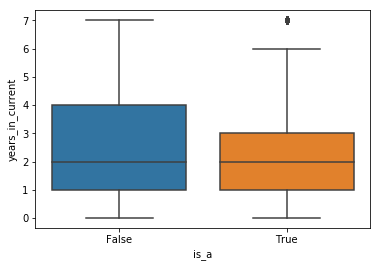

In [10]:
sns.boxplot(x = "is_a", y = "years_in_current", data=df)
plt.show()

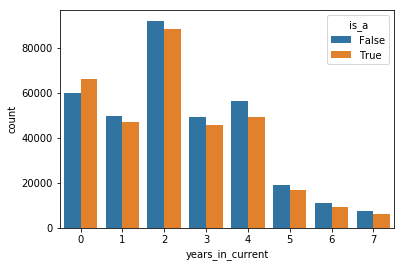

In [30]:
sns.countplot(x="years_in_current", hue='is_a', data=df)
plt.show()

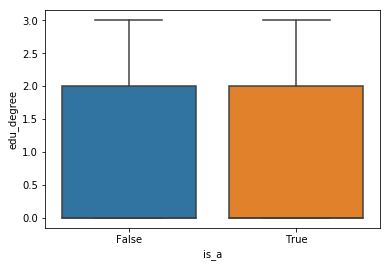

In [11]:
sns.boxplot(x = "is_a", y = "edu_degree", data=df)
plt.show()

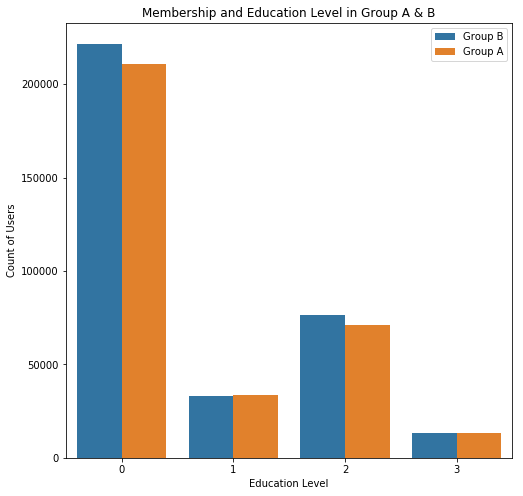

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(x="edu_degree", hue='is_a', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count of Users')
plt.legend(['Group B', 'Group A'])
plt.title('Membership and Education Level in Group A & B')
plt.show()

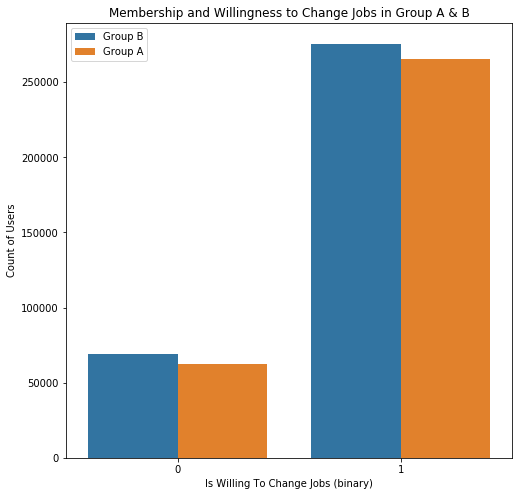

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x = "wtcj", hue="is_a", data=df)
plt.xlabel('Is Willing To Change Jobs (binary)')
plt.ylabel('Count of Users')
plt.legend(['Group B', 'Group A'])
plt.title('Membership and Willingness to Change Jobs in Group A & B')
plt.show()

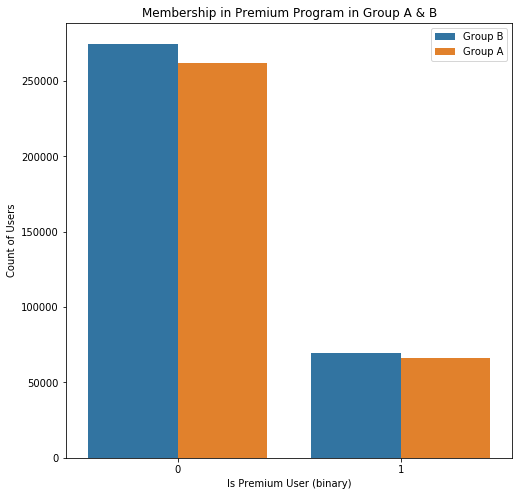

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(x="premium", hue="is_a", data=df)
plt.xlabel('Is Premium User (binary)')
plt.ylabel('Count of Users')
plt.legend(['Group B', 'Group A'])
plt.title('Membership in Premium Program in Group A & B')
plt.show()

In [63]:
df_heat = df.drop(
    ['id', 'field_of_studies', 'jobroles', 'country', 'region', 'industry_id', 'discipline_id', 'field_of_studies', 
     'user_id', 'prob_a'], axis=1)

In [64]:
df_heat['is_a'] = df_heat['is_a'].astype(int)

In [67]:
df_heat.head()

,career_level,experience_n_entries_class,years_experience,years_in_current,edu_degree,wtcj,premium,interaction_count,is_a
0,3,3,4,1,2,1,0,1,0
1,3,2,7,2,0,1,0,1,0
2,0,1,0,0,0,0,0,31,1
3,0,3,4,0,2,1,0,31,1
4,0,3,6,2,0,1,0,2,0


In [ ]:
corr = np.corrcoef(df_heat)
sns.heatmap(corr)
plt.show()